In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# thanks to user Kostiantyn Isaienkov for the dataset
%matplotlib inline 
# inline is to display inside notebook

import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

 # for chart to look sharp
%config InlineBackend.figure_format = 'retina'
sns.set()

#Clean Code when it's done

The NBA which stands for National Basketball Association is a professional basketball league in North America. It is founded in 1946 and it is now one of the four major sports league in the US and Canada with 30 teams playing 82 season games where 16 seeded teams will play in the playoffs. 

This notebook is a EDA on nba players based on the famous video game - NBA2k20 so the data is based on the NBA players in the 2019/2020 season. 
The dataset is obtained through Kaggle and through the data visualisation we can take a look on the correlation and info on the NBA basketball players.

In [ ]:
df_nba = pd.read_csv('/kaggle/input/nba2k20-player-dataset/nba2k20-full.csv')

In [ ]:
df_nba.rename(columns={'draft_peak': 'draft_pick'}, inplace=True)

In [ ]:
df_nba.sample(5)

In [ ]:
df_nba.info()

In [ ]:
# The feature engineering part is inspired by user RachidYZ's notebook
def from_date_to_age(date):
    born=datetime.datetime.strptime(date, '%m/%d/%y')
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
def int_weight(weight):
    return weight.split("/")[1].split(" ")[1]
def int_height(height):
    return height.split("/")[1].split(" ")[1]

df_nba['height']=df_nba['height'].apply(lambda x: int_height(x)).astype('float')
df_nba['weight']=df_nba['weight'].apply(lambda x: int_weight(x)).astype('float')

# convert height and weight to float values and rename 
df_nba.rename({'height':'height_in_m','weight':'weight_in_kg'},axis='columns',inplace=True)

# convert salary to int values
df_nba['salary'] = df_nba['salary'].str[1:].astype('int64')

# convert draft round,pick to int and handle missing value
df_nba['draft_round'] = df_nba['draft_round'].replace({'Undrafted': 0}).astype('int8')

df_nba['jersey'] = df_nba['jersey'].str[1:].astype('int8')

# Indicate if a nba players attended college 
df_nba['college'].isna().astype('int').value_counts() 
df_nba['attended_college'] = ~(df_nba['college'].isna().astype('bool'))

# Indicate their current age
df_nba['current_age']=df_nba['b_day'].apply(lambda x: from_date_to_age(x))

# indicate the numbers of years played since they started nba
df_nba['year_played'] = df_nba['current_age'] - (df_nba['draft_year'] - pd.to_datetime(df_nba['b_day']).dt.year)
df_nba.drop(columns=['b_day'],inplace=True)

In [ ]:
df_nba.info()

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(df_nba.corr(),cmap='Blues',annot=True, fmt='.2f')

In this correlation matrix, the information that can be extracted is that:
1. The correlation of rating and salary is high which means the higher the player's rating are, the higher the salary for the player.
2. The second strong correlation which is to no surprise is the height and the weight. Normally the taller the player is the heavier he will weigh.
3. The salary for younger players are usually lesser as they are inexperience and they have yet to prove their worth in the league. Where as the salary will gradually increase as the players played longer in the league.

In [ ]:
#weight distribution distribution graph
plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['weight_in_kg'], color = 'b', kde = True)
plt.xlabel('Player\'s Weight')
plt.ylabel('Count of players')
plt.title('Players\' Weight Distribution', fontsize=18)
plt.xticks()
plt.show()

In [ ]:
#height distribution distribution graph
plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['height_in_m'], color = 'b', kde = True)
plt.xlabel('Player\'s Height')
plt.ylabel('Player\'s Count')
plt.title('Players\' Height Distribution', fontsize=18)
plt.xticks()
plt.show()

The distribution for the players' height and weight doesn't show aything surprising as the graph shows a normal distribution. Most players weigh about 90 - 100kg and the players height as in the 2 meter range. 

In [ ]:
df_nba['jersey'].value_counts()[0:10] #jersey #0 is the highest count 

The most favorite player's jersey number is #0. The number is far more than the second and the third jersey number count which is #3 and #11

In [ ]:
#This row for trying out the jersey number #0 problem

jersey_0 = df_nba[(df_nba['team'].notnull()) & (df_nba['jersey'] == 0)]
jersey_0.count()

The jersey number #0 count is suppose to be 57 by removing the free agents as they don't have a jersey number. But the jersey number #0 is still by far the players' favourite jersey number. 

In [ ]:
print((df_nba['team'].isna()).value_counts()) #maybe got another code to try.
df_nba[df_nba['team'].isna()] #free agents

The table above shows the list of players that are free agents in the 2019/2020 season. This means that no teams have found any suitable role to fill these players into the team. As the ratings shows that the players are usually on the lower end of the rating. 

In [ ]:
country = df_nba[['country','full_name']].groupby('country').count().sort_values(by='full_name', ascending=False)
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=country.index, y=country.full_name)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Player\'s Count')
plt.title('Players\' Country', fontsize=18)
plt.show()

Nothing too surprising that most of the players in the NBA is from USA and Canada. The NBA league is very diverse basketball league with players from 39 countries playing.

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
#distplot distribution plot, histplot histogram, kde = True >> the Line, shrink >> distance between the barcharts
sns.histplot(df_nba['rating'], color = 'b',kde = True, shrink = .8) 
plt.xlabel('Rating')
plt.ylabel('Count of players')
plt.title('Players\' Rating Distribution', fontsize=18)
plt.xticks()
plt.show()
print(f'{df_nba[df_nba.rating == df_nba.rating.max()].full_name.values[0]} is the highest rated -->> ({df_nba.rating.max()})')
print(f'{df_nba[df_nba.rating == df_nba.rating.min()].full_name.values[0]} is the lowest rated -->> ({df_nba.rating.min()})')

As shown in the graph, most of the players are rated among the 70s - 80s. Very few players are in the 90s and these players are considered superstars that are higly rated in the NBA.

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['current_age'], color = 'b')
plt.xlabel('Player\'s Age')
plt.ylabel('Count of players')
plt.title('Number of Players By Age', fontsize=18)
plt.xticks()
plt.show()
print(f'{df_nba[df_nba.current_age == df_nba.current_age.max()].full_name.values[0]} is the oldest nba player -->> ({df_nba.current_age.max()} years old)')
print(f'{df_nba[df_nba.current_age == df_nba.current_age.min()].full_name.values[0]} is the youngest nba players -->> ({df_nba.current_age.min()} years old)')

Most of the players in the NBA are usually in their early 20s which are their prime years as they are in their peak physique and some experience in the league that can help them mentally in the long season games.

There are 10 players in a basketball game which are divided into 2 teams with 5 players in each team. A team consist of positions which are two Gs for guards, two Fs for forward and one C for centers. Below shows the positions and a brief explaination on what their traditional roles are in a team.

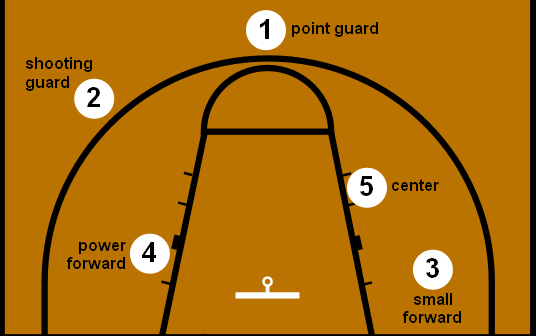

1.  Point Guard - These are players known as "Coach of the Floor". Their responsibility is to read the opponent team, assess their strength and weaknesses and lead the team to victory. The players in this position are usually the shortest ones in the team but have outstanding dribbling skills.

2. Shooting Guard - As the name suggests, the players in this positions are usually the ones that can score from the inside through penetration or shoot from mid-range and the three point line. They are usually fast, agile and have good shooting ability.

3. Small Forward - This position is the most versatile of all the five positions. The players of this position usually can do a little bit of everything on the court. This position requires the players to have a good mix of offensive and defensive skills. They can also be the main scorer of the team if necessary

4. Power Forward - Players of this position usually scores in the inside or form the midrange. They need to have good defensive ability to guard players in near to the basket. Their role is to be the extra muscle to snatch rebounds on the game.

5. Center - The centers are usually the tallest and the strongest player on the team. Their main role in the team is to get rebounds and block shots. Their usually have great defensive abilities and they are able to score the basket up close in the paint. 

In [ ]:
df_nba.loc[df_nba['position'] == 'C-F', 'position'] = 'F-C'
df_nba.loc[df_nba['position'] == 'F-G', 'position'] = 'G-F'
position = df_nba['position']
plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(position, order = df_nba['position'].value_counts().index)  #order = [] >> sorting
plt.xlabel('Position_of_Players')
plt.ylabel('Players Count')
plt.title('Players\' Position Count', fontsize=18)
plt.show()

The league consists of players that play the position of Guard - (Point Guard or Shooting Guard) most. Followed by players that play the Forward position - (Small Forward or Power Forward). There are also players that play two different position, F-C (Forward and Center) and also G-F (Guard and Forward).

In [ ]:
#draft year

plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['draft_year'], color='b')
plt.xlabel('Draft_Year')
plt.ylabel('Count of players')
plt.title('Number of Players By Draft Year')
plt.xticks()
plt.show()

Players of the 2018 draft class are the most in the 2019/2020 season. Most of the players that are drafted in the early 2000s are mostly retired because of their age. 

In [ ]:
#draft round

plt.rcParams['figure.figsize'] = (10, 8)
sns.countplot(df_nba['draft_round'], color = 'b')
plt.xlabel('Player\'s Draft Round')
plt.ylabel('Count of players')
plt.title('Number of Players By Draft Round', fontsize=18)
plt.xticks()

In [ ]:
#salary distribution

df_nba['salary'] = df_nba['salary'].astype(str).str.replace('$', '')
df_nba['salary'] = df_nba['salary'].astype(np.float64)

plt.rcParams['figure.figsize'] = (10, 8)
sns.histplot(df_nba['salary'], color = 'b', kde = True, bins = 100)
plt.xlabel('Salary of Players')
plt.ylabel('Count of Players')
plt.title('Players\' Salary Distribution',fontsize=18)
plt.xticks()
plt.show()

More players have the salary range of $1 - $500k according to the graph. A lot of players have a salary of less than $1m. 

In [ ]:
salary_sort = df_nba[['team','salary']].sort_values(by='salary', ascending=False)

plt.rcParams['figure.figsize'] = (15, 8)
salary_sort.reset_index(inplace=True)
x = sns.boxplot(x='team', y='salary', data=salary_sort, palette='rocket')
x.set_xticklabels(x.get_xticklabels(), rotation=90)
plt.title('Salary distribution based on teams', fontsize=18)

In [ ]:
df_nba.iloc[df_nba.groupby(df_nba['team'])['salary'].idxmax()].reset_index().sort_values(by='salary', ascending=False).reset_index()[['full_name','team', 'rating', 'salary']]

The table shows the most paid players on each team with the highest paid player in the league on the 2019/2020 is Stephen Curry.

In [ ]:
df_nba.iloc[df_nba.groupby(df_nba['team'])['rating'].idxmax()].reset_index().sort_values(by='rating', ascending=False).reset_index()[[ 'full_name','position','team', 'rating']]

Comparing both the tables above, Most of the most paid players are the highest rated players on the team. This is a pattern that we expect because from the correlation table, the rating and the salary of a player has a very strong correlation.

In [ ]:
salary_avg = df_nba[['team','salary']].groupby('team').mean().sort_values(by='salary', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = salary_avg.index, y=salary_avg.salary, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Average Salary')
plt.title('Players\' Average Salary By Teams',fontsize=18)
plt.show()

In [ ]:
#average rating for every team
team_avg = df_nba[['team','rating']].groupby('team').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = team_avg.index, y=team_avg.rating, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Teams')
plt.ylabel('Average rating')
plt.title('Players\' average rating over all teams',fontsize=18)
plt.show()

It is known that an individual player's rating is strongly correlated to the salary of the player. The higher rated the player is, the higher salary he has. The average rating of a team however shows a different pattern. The higher the average salary for the team does not mean the higher the average rating of the team. 

In [ ]:
print(df_nba['team'].value_counts())

The average rating for the Los Angeles Clippers are the highest followed by the Golden State Warriors and Brooklyn Nets. The three highest average team has a player with ratings in the high 90s. This may be a reason why their teams have a high average rating. 

Although another reason for GSW to be the number 2 highest rated team is also due to the low player count in the team which is the 9 players only. Lower player count can be a factor for higher average rating.

In [ ]:
#average rating by draft year

draft_year_avg = df_nba[['draft_year','rating']].groupby('draft_year').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x = draft_year_avg.index, y=draft_year_avg.rating, data = df_nba, palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Draft Year')
plt.ylabel('Average rating')
plt.title('Players\' average rating by Draft Year', fontsize=18)
plt.show()

The players from draft year - 2003 have the highest average among all the draft years.

In [ ]:
# college and non-college
college_avg = df_nba[['attended_college','rating']].groupby('attended_college').mean()
plt.figure(figsize=(15, 10))
sns.barplot(x = college_avg.index, y=college_avg.rating, data = df_nba, color='b')
plt.xlabel('Attended College')
plt.ylabel('Average Rating')
plt.title('Differences of Average Rating of Players Attended College or Not' ,fontsize=18)
plt.show()

The graph above shows that the rating of a player is not really affect whether or not the players attend college. The average rating is alsmot similar to each other. 

In [ ]:
# college and non-college
salary_avg = df_nba[['attended_college','salary']].groupby('attended_college').mean()
plt.figure(figsize=(15, 10))
sns.barplot(x = salary_avg.index, y=salary_avg.salary, data = df_nba, color='b')
plt.xlabel('Attended College')
plt.ylabel('Average Salary')
plt.title('Differences of Average Salary of Players Attended College or Not' ,fontsize=18)
plt.show()

The average salary however has small differences. The players that went to the NBA directly has a higher average salary than the players that attended college.

In [ ]:
#average rating by draft pick

draft_pick_avg = df_nba[['draft_pick','rating']].groupby('draft_pick').mean().sort_values(by='rating', ascending=False)
plt.figure(figsize=(15, 20))
sns.barplot(x = draft_pick_avg.rating, y=draft_pick_avg.index, data = df_nba, color='b')
plt.xlabel('Average rating')
plt.ylabel('Draft Pick')
plt.title('Players\' average rating by draft pick',fontsize=18)
plt.show()

The highest average rating for draft pick is the pick #1 which is to be expected because usually higher rated players are usually pick first by teams. The graphs shows that the higher draft pick has higher rating except for draft pick #27 being 3rd highest average rating. This may due to an outlier such as a draft pick #27 player of a certain draft year may be very high rated and it lifts up the average rating of draft pick #27.

In [ ]:
# talk about the graph a bit
oldest_players = df_nba.sort_values(['current_age', 'rating'], ascending=False).head(15)
print(oldest_players[['full_name','rating','current_age']])

plt.figure(figsize=(15, 10))
sns.barplot(x = oldest_players.rating, y=oldest_players['full_name'], data = oldest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Oldest Players',fontsize=18)
plt.show()

In [ ]:
#talk aboout the graph a bit
salary_oldest = df_nba.sort_values(['current_age', 'salary'], ascending=False).head(15)
print(salary_oldest[['full_name','rating','current_age','salary']])

plt.figure(figsize=(15, 10))
sns.barplot(x = salary_oldest.salary, y=salary_oldest['full_name'], data = salary_oldest, palette='rocket')
plt.xlabel('Salary')
plt.ylabel('Name of Players')
plt.title('Oldest Players and Their Salary', fontsize=18)
plt.show()

Teams usually pay older players lesser because sa their age goes up they become less athletic, has less potential to improve their game and are more prone to injury. With the exception of Lebron James, Paul Millsap and Chris Paul having more that $3m of salary because they have very high ratings.

In [ ]:
# talk about the graph a bit
youngest_players = df_nba.sort_values(['current_age', 'rating'], ascending=True).head(15)
print(youngest_players[['full_name','rating','current_age']])

plt.figure(figsize=(15, 10))
sns.barplot(x = youngest_players.rating, y=youngest_players['full_name'], data = youngest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Youngest Players', fontsize=18)
plt.show()

In [ ]:
#talk about the graph a bit
salary_youngest = df_nba.sort_values(['current_age', 'salary'], ascending=True).head(15)
print(salary_youngest[['full_name','rating','current_age','salary']])

plt.figure(figsize=(15, 10))
sns.barplot(x = salary_youngest.salary, y=salary_youngest['full_name'], data = salary_youngest, palette='rocket')
plt.xlabel('Salary')
plt.ylabel('Name of Players')
plt.title('Youngest Players and Their Salary', fontsize=18)
plt.show()

Similarly to the older players, the younger players have a similar pattern. Teams will also pay them lesser because they are inexperienced. With the exception of Zion Williamson having a salary of almost $1m but being the only one rated more than 80 among the youngest players. 

In [ ]:
tallest_players = df_nba.sort_values(['height_in_m', 'rating'], ascending=False).head(15)
print(tallest_players[['full_name','weight_in_kg','height_in_m', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = tallest_players.rating, y=tallest_players['full_name'], data = tallest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Tallest Players',fontsize=18)
plt.show()

As mentioned in the text above, the center position is played by taller players, the graph shows that the top 15 tallest players are Forward or Center position. 

In [ ]:
shortest_players = df_nba.sort_values(['height_in_m', 'rating'], ascending=True).head(15)
print(shortest_players[['full_name','rating','height_in_m', 'position']])
plt.figure(figsize=(15, 10))
sns.barplot(x = shortest_players.rating, y=shortest_players['full_name'], data = shortest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Shortest Players',fontsize=18)
plt.show()

The similar pattern is seen in the graph for "top 15 shortest players". All the players play the guard position which is nothing out of the ordinary.


In [ ]:
heaviest_players = df_nba.sort_values(['weight_in_kg', 'rating'], ascending=False).head(15)
print(heaviest_players[['full_name','height_in_m','weight_in_kg', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = heaviest_players.rating, y=heaviest_players['full_name'], data = heaviest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Heaviest Players',fontsize=18)
plt.show()

The barplot for heaviest players shows that the patterns are similar to the tallest players barplot. The height of a player is strongly correlated to the weight of the player. Therefore the taller players are usually heavier and they play either the Forward or Center position which requires the player to be tall.

In [ ]:
lightest_players = df_nba.sort_values(['weight_in_kg', 'rating'], ascending=True).head(15)
print(lightest_players[['full_name','height_in_m','weight_in_kg', 'position']])

plt.figure(figsize=(15, 10))
sns.barplot(x = lightest_players.rating, y=lightest_players['full_name'], data = lightest_players, palette='rocket')
plt.xlabel('Rating')
plt.ylabel('Name of Players')
plt.title('Top 15 Lightest Players',fontsize=18)
plt.show()

The same can be said to this barplot as well. The light players are usually shorter and the play the guard position. The sports require them to be agile and quick on their feet to move or dribble the ball around faster and avoid opponents and score the basket more efficiently.


In [ ]:
sorted_df_rating = df_nba.sort_values(['rating'], ascending=False)
positions = ['G', 'G-F', 'F', 'F-C', 'C']
best_players_for_each_position = list()

for pos in positions:
    part = sorted_df_rating[sorted_df_rating['position']==pos]
    best_players_for_each_position.append(part.head(1))
    
best_players_for_each_position = pd.concat(best_players_for_each_position)
print(best_players_for_each_position)

The above is the best players in the NBA league for the 2019/2020 season for each positions according to the game, be sure to get these players if you are playing the fantasy draft mode in myleague mode. 